<a href="https://colab.research.google.com/github/salv0304/Colab/blob/main/copia_di_relazione_lambert_beer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Relazione Lambert-Beer**

In [ ]:
import numpy as np
from scipy import optimize as sop
from scipy import constants as scc
import matplotlib.pyplot as plt  
from google.colab import files
import pandas as pd
from google.colab import files
from scipy.optimize import curve_fit 

Scopo dell'esperienza è quello di verificare la legge **$I=I_0e^{-n\alpha}$** e trovare il best fit del **coefficiente di assorbimento $\alpha$**.

 Poniamo un LED  davanti a dua placchette di plexiglass e un numero $n$ via via crescente di foglietti di carta. Leggiamo l'intensità $I$ del segnale su un voltmetro posto in uscita del fotodiodo.

Prendiamo come $I_0$ l'intensità misurata in assenza di foglietti, cioè $I_0=0.38 A$. Inoltre, poichè all'aumentare di $n$ l'errore sistematico aumenta, portando ad una sottostima di $\alpha$, è comodo inserire un parametro correttivo $I_b$. Pertanto useremo come funzione di fit  $I=I_0e^{-n\alpha}+ I_b$

##LED Rosso

In [ ]:
def function(N,alpha,Ib):
    I = 0.38*np.exp(-alpha*N)+Ib #valore di I_0 fissato
    return I

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


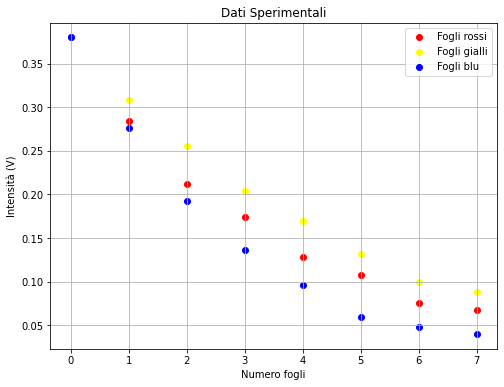

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("led_rosso.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
N=dati[:,0] 
Ampiezza1=dati[:,1] #foglietti rossi
Ampiezza2=dati[:,2] #foglietti gialli
Ampiezza3=dati[:,3] #foglietti blu


AmpiezzaRosso=[i/1000 for i in Ampiezza1] #Conversione in SI
AmpiezzaGiallo=[i/1000 for i in Ampiezza2]
AmpiezzaBlu=[i/1000 for i in Ampiezza3]


plt.scatter(N, AmpiezzaRosso, color='red', label='Fogli rossi')
plt.scatter(N, AmpiezzaGiallo, color='yellow', label='Fogli gialli')
plt.scatter(N, AmpiezzaBlu, color='blue', label='Fogli blu')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Numero fogli")
plt.ylabel("Intensità (V)")
plt.legend()

###Fit foglietti rossi

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(alpha, Ib, print_output=True, plot_guess=False):
 
  guess = np.array([alpha, Ib]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(function, N, AmpiezzaRosso, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, function(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(N)
  plt.figure(figsize=[10,6])
  xmin,xmax=N[0],N[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=function(x,popt[0], popt[1])
  plt.ylabel('Intensità (V)', fontsize=20)
  plt.xlabel('Numero fogli', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(N,AmpiezzaRosso,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["alpha", "Ib"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

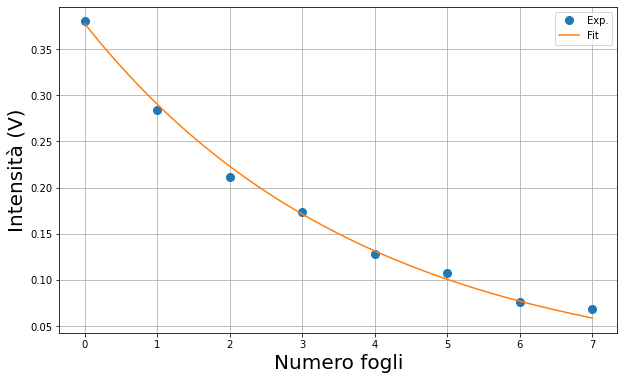

      alpha = 0.2607010053 +- 0.0154927979
         Ib = -0.0025181601 +- 0.0067668055




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.2,0.05)

###Fit foglietti gialli

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(alpha, Ib, print_output=True, plot_guess=False):
 
  guess = np.array([alpha, Ib]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(function, N, AmpiezzaGiallo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, function(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(N)
  plt.figure(figsize=[10,6])
  xmin,xmax=N[0],N[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=function(x,popt[0], popt[1])
  plt.ylabel('Intensità (V)', fontsize=20)
  plt.xlabel('Numero fogli', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(N,AmpiezzaGiallo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["alpha", "Ib"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

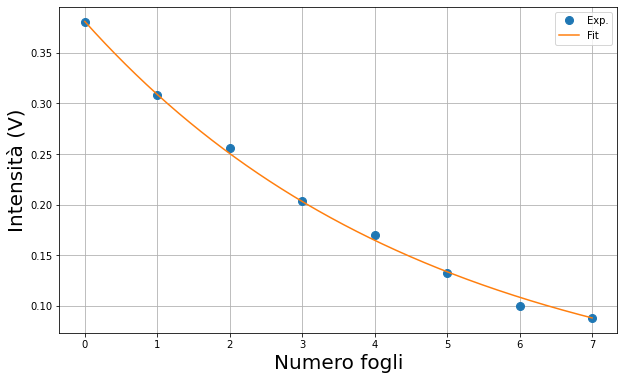

      alpha = 0.2103159477 +- 0.0076932837
         Ib = 0.0008737214 +- 0.0041883026




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.2,0.05)

###Fit foglietti blu

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(alpha, Ib, print_output=True, plot_guess=False):
 
  guess = np.array([alpha, Ib]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(function, N, AmpiezzaBlu, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, function(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(N)
  plt.figure(figsize=[10,6])
  xmin,xmax=N[0],N[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=function(x,popt[0], popt[1])
  plt.ylabel('Intensità (V)', fontsize=20)
  plt.xlabel('Numero fogli', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(N,AmpiezzaBlu,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["alpha", "Ib"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

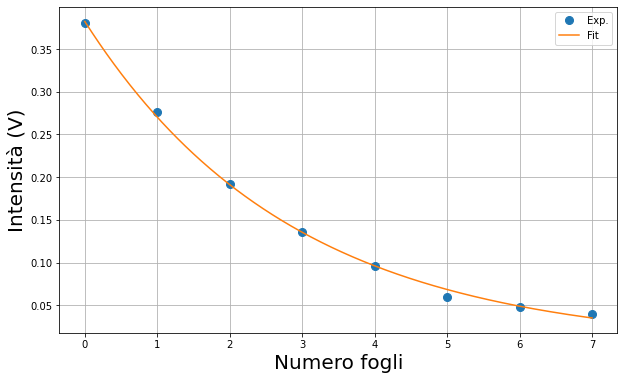

      alpha = 0.3492878620 +- 0.0139316534
         Ib = 0.0022329641 +- 0.0042866824




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.2,0.05)

##LED Giallo

In [ ]:
def function(N,alpha,Ib):
    I = 0.14*np.exp(-alpha*N)+Ib #valore di I_0 fissato
    return I

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


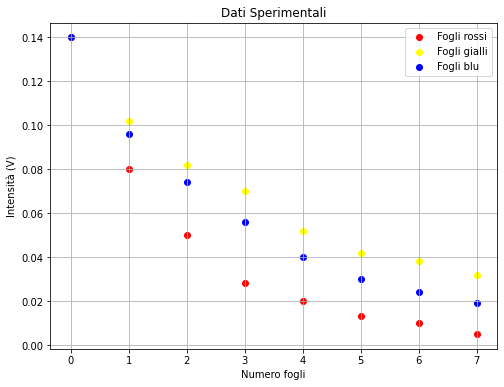

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("led_giallo.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
N=dati[:,0] 
Ampiezza1=dati[:,1] #foglietti rossi
Ampiezza2=dati[:,2] #foglietti gialli
Ampiezza3=dati[:,3] #foglietti blu


AmpiezzaRosso=[i/1000 for i in Ampiezza1] #Conversione in SI
AmpiezzaGiallo=[i/1000 for i in Ampiezza2]
AmpiezzaBlu=[i/1000 for i in Ampiezza3]


plt.scatter(N, AmpiezzaRosso, color='red', label='Fogli rossi')
plt.scatter(N, AmpiezzaGiallo, color='yellow', label='Fogli gialli')
plt.scatter(N, AmpiezzaBlu, color='blue', label='Fogli blu')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Numero fogli")
plt.ylabel("Intensità (V)")
plt.legend()

###Fit foglietti rossi

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(alpha, Ib, print_output=True, plot_guess=False):
 
  guess = np.array([alpha, Ib]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(function, N, AmpiezzaRosso, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, function(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(N)
  plt.figure(figsize=[10,6])
  xmin,xmax=N[0],N[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=function(x,popt[0], popt[1])
  plt.ylabel('Intensità (V)', fontsize=20)
  plt.xlabel('Numero fogli', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(N,AmpiezzaRosso,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["alpha", "Ib"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

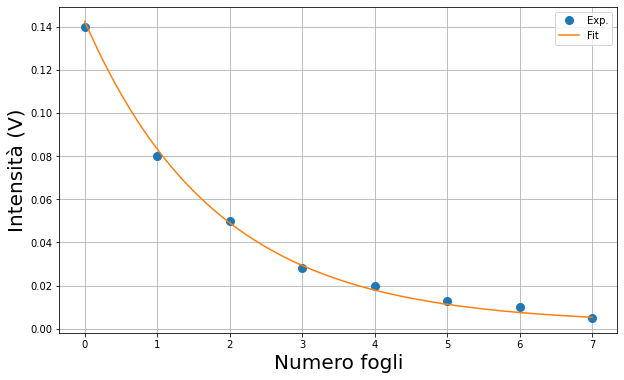

      alpha = 0.5489070519 +- 0.0262737968
         Ib = 0.0023350583 +- 0.0015855900




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.2,0.05)

###Fit foglietti gialli

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(alpha, Ib, print_output=True, plot_guess=False):
 
  guess = np.array([alpha, Ib]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(function, N, AmpiezzaGiallo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, function(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(N)
  plt.figure(figsize=[10,6])
  xmin,xmax=N[0],N[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=function(x,popt[0], popt[1])
  plt.ylabel('Intensità (V)', fontsize=20)
  plt.xlabel('Numero fogli', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(N,AmpiezzaGiallo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["alpha", "Ib"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

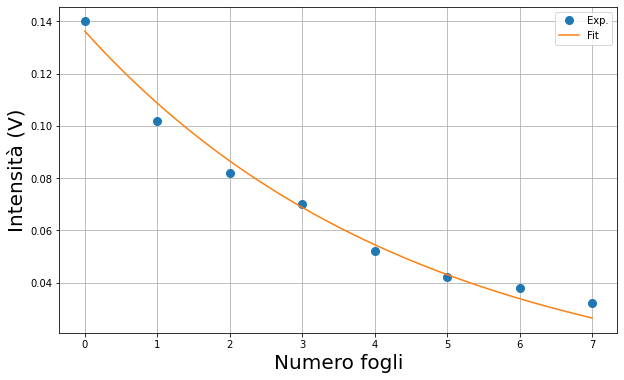

      alpha = 0.2193379143 +- 0.0220328416
         Ib = -0.0037369164 +- 0.0042435780




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.2,0.05)

###Fit foglietti blu

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(alpha, Ib, print_output=True, plot_guess=False):
 
  guess = np.array([alpha, Ib]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(function, N, AmpiezzaBlu, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, function(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(N)
  plt.figure(figsize=[10,6])
  xmin,xmax=N[0],N[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=function(x,popt[0], popt[1])
  plt.ylabel('Intensità (V)', fontsize=20)
  plt.xlabel('Numero fogli', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(N,AmpiezzaBlu,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["alpha", "Ib"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

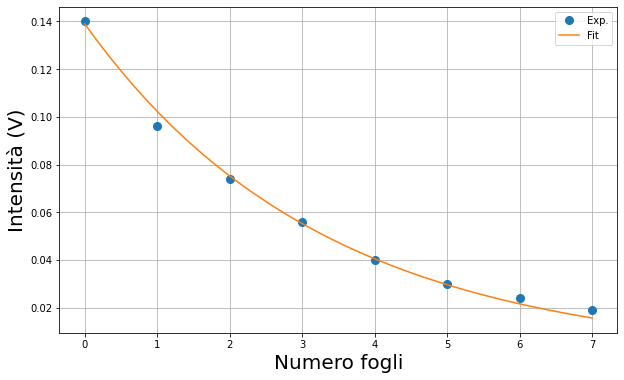

      alpha = 0.3040368488 +- 0.0216213812
         Ib = -0.0010133960 +- 0.0029141042




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.2,0.05)

##LED Blu

In [ ]:
def function(N,alpha,Ib):
    I = 0.184*np.exp(-alpha*N)+Ib #valore di I_0 fissato
    return I

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


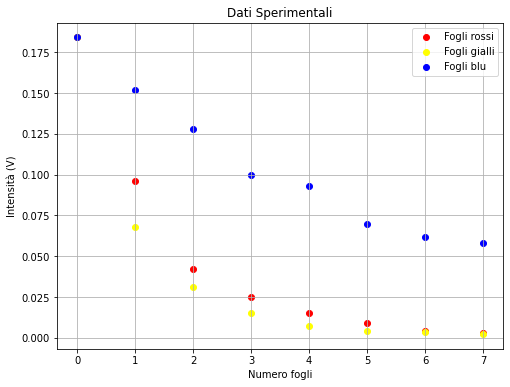

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("led_blu.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
N=dati[:,0] 
Ampiezza1=dati[:,1] #foglietti rossi
Ampiezza2=dati[:,2] #foglietti gialli
Ampiezza3=dati[:,3] #foglietti blu


AmpiezzaRosso=[i/1000 for i in Ampiezza1] #Conversione in SI
AmpiezzaGiallo=[i/1000 for i in Ampiezza2]
AmpiezzaBlu=[i/1000 for i in Ampiezza3]


plt.scatter(N, AmpiezzaRosso, color='red', label='Fogli rossi')
plt.scatter(N, AmpiezzaGiallo, color='yellow', label='Fogli gialli')
plt.scatter(N, AmpiezzaBlu, color='blue', label='Fogli blu')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Numero fogli")
plt.ylabel("Intensità (V)")
plt.legend()

###Fit foglietti rossi

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(alpha, Ib, print_output=True, plot_guess=False):
 
  guess = np.array([alpha, Ib]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(function, N, AmpiezzaRosso, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, function(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(N)
  plt.figure(figsize=[10,6])
  xmin,xmax=N[0],N[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=function(x,popt[0], popt[1])
  plt.ylabel('Intensità (V)', fontsize=20)
  plt.xlabel('Numero fogli', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(N,AmpiezzaRosso,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["alpha", "Ib"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

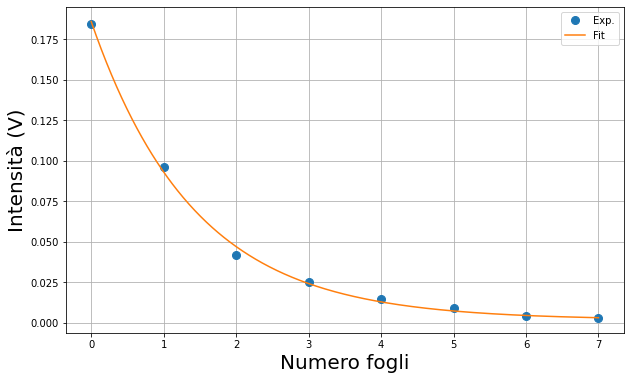

      alpha = 0.7018901668 +- 0.0288894775
         Ib = 0.0018130718 +- 0.0015855097




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.2,0.05)

###Fit foglietti gialli

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(alpha, Ib, print_output=True, plot_guess=False):
 
  guess = np.array([alpha, Ib]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(function, N, AmpiezzaGiallo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, function(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(N)
  plt.figure(figsize=[10,6])
  xmin,xmax=N[0],N[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=function(x,popt[0], popt[1])
  plt.ylabel('Intensità (V)', fontsize=20)
  plt.xlabel('Numero fogli', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(N,AmpiezzaGiallo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["alpha", "Ib"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

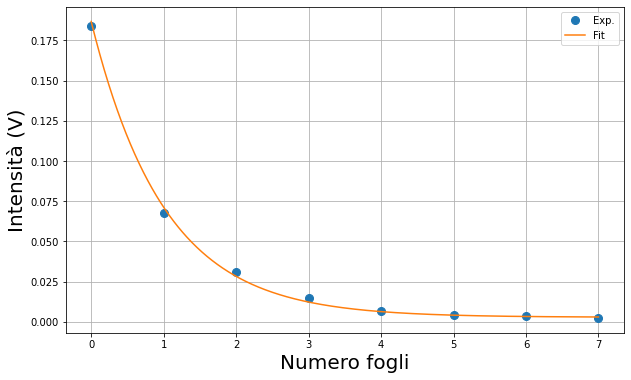

      alpha = 0.9886833381 +- 0.0352572407
         Ib = 0.0028303837 +- 0.0011385630




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.2,0.05)

###Fit foglietti blu

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(alpha, Ib, print_output=True, plot_guess=False):
 
  guess = np.array([alpha, Ib]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(function, N, AmpiezzaBlu, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, function(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(N)
  plt.figure(figsize=[10,6])
  xmin,xmax=N[0],N[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=function(x,popt[0], popt[1])
  plt.ylabel('Intensità (V)', fontsize=20)
  plt.xlabel('Numero fogli', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(N,AmpiezzaBlu,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["alpha", "Ib"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

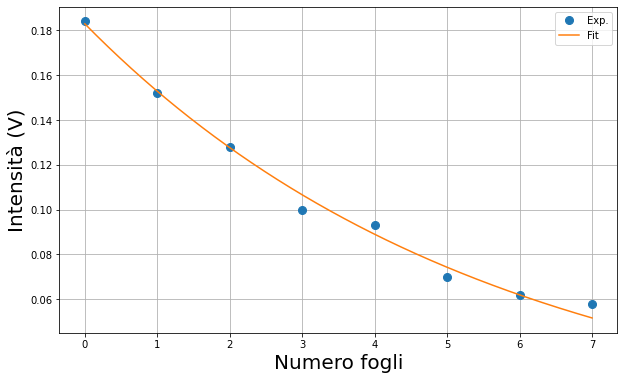

      alpha = 0.1786414969 +- 0.0124274063
         Ib = -0.0010426301 +- 0.0037917872




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.2,0.05)

##LED Verde

In [ ]:
def function(N,alpha,Ib):
    I = 0.094*np.exp(-alpha*N)+Ib #valore di I_0 fissato
    return I

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


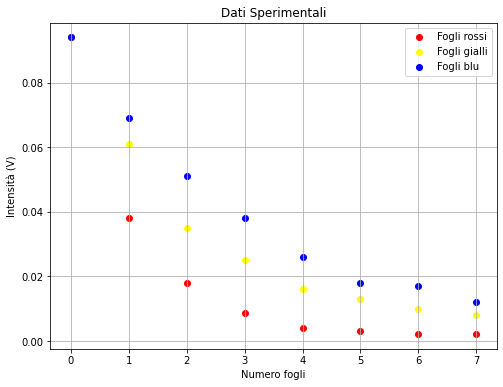

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("led_verde.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
N=dati[:,0] 
Ampiezza1=dati[:,1] #foglietti rossi
Ampiezza2=dati[:,2] #foglietti gialli
Ampiezza3=dati[:,3] #foglietti blu


AmpiezzaRosso=[i/1000 for i in Ampiezza1] #Conversione in SI
AmpiezzaGiallo=[i/1000 for i in Ampiezza2]
AmpiezzaBlu=[i/1000 for i in Ampiezza3]


plt.scatter(N, AmpiezzaRosso, color='red', label='Fogli rossi')
plt.scatter(N, AmpiezzaGiallo, color='yellow', label='Fogli gialli')
plt.scatter(N, AmpiezzaBlu, color='blue', label='Fogli blu')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Numero fogli")
plt.ylabel("Intensità (V)")
plt.legend()

###Fit foglietti rossi

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(alpha, Ib, print_output=True, plot_guess=False):
 
  guess = np.array([alpha, Ib]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(function, N, AmpiezzaRosso, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, function(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(N)
  plt.figure(figsize=[10,6])
  xmin,xmax=N[0],N[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=function(x,popt[0], popt[1])
  plt.ylabel('Intensità (V)', fontsize=20)
  plt.xlabel('Numero fogli', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(N,AmpiezzaRosso,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["alpha", "Ib"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

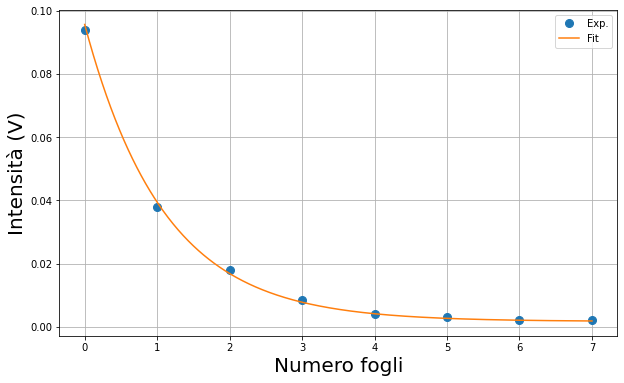

      alpha = 0.9121446679 +- 0.0291638103
         Ib = 0.0016780783 +- 0.0005462069




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.2,0.05)

###Fit foglietti gialli

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(alpha, Ib, print_output=True, plot_guess=False):
 
  guess = np.array([alpha, Ib]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(function, N, AmpiezzaGiallo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, function(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(N)
  plt.figure(figsize=[10,6])
  xmin,xmax=N[0],N[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=function(x,popt[0], popt[1])
  plt.ylabel('Intensità (V)', fontsize=20)
  plt.xlabel('Numero fogli', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(N,AmpiezzaGiallo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["alpha", "Ib"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

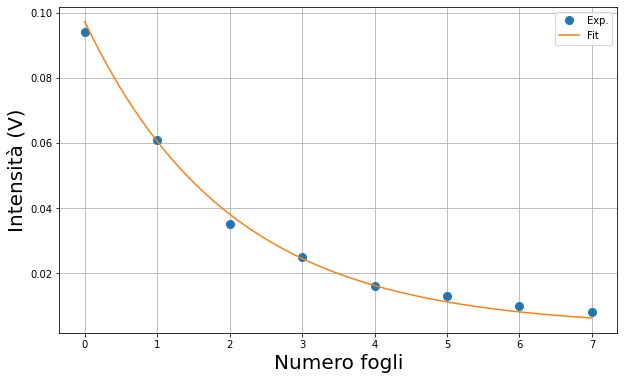

      alpha = 0.4967545504 +- 0.0363836179
         Ib = 0.0033012162 +- 0.0017057455




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.2,0.05)

###Fit foglietti blu

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(alpha, Ib, print_output=True, plot_guess=False):
 
  guess = np.array([alpha, Ib]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(function, N, AmpiezzaBlu, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, function(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(N)
  plt.figure(figsize=[10,6])
  xmin,xmax=N[0],N[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=function(x,popt[0], popt[1])
  plt.ylabel('Intensità (V)', fontsize=20)
  plt.xlabel('Numero fogli', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(N,AmpiezzaBlu,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["alpha", "Ib"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

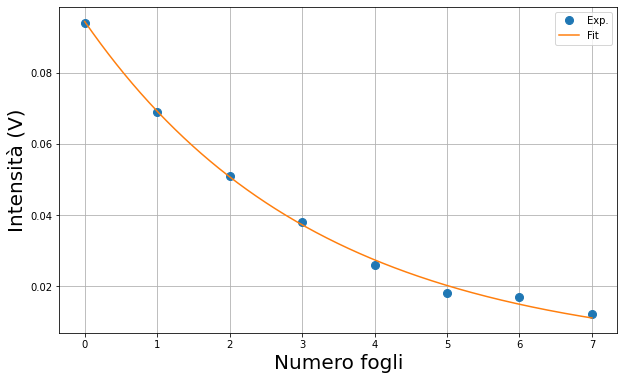

      alpha = 0.3130249494 +- 0.0154652450
         Ib = 0.0004806006 +- 0.0013509288




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.2,0.05)